In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet
import numpy as np

In [2]:
df=yf.download('BTC-USD',start='2017-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...
2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,19290.324219,35239757134
2022-09-08,19289.941406,19417.351562,19076.714844,19329.833984,19329.833984,32194477850
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171


In [3]:
df=df.reset_index()

In [4]:
df[['ds','y']]=df[['Date','Adj Close']]
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104,2016-12-31,963.742981
1,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-01-01,998.325012
2,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-01-02,1021.750000
3,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-01-03,1043.839966
4,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-01-04,1154.729980
...,...,...,...,...,...,...,...,...,...
2076,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,19290.324219,35239757134,2022-09-07,19290.324219
2077,2022-09-08,19289.941406,19417.351562,19076.714844,19329.833984,19329.833984,32194477850,2022-09-08,19329.833984
2078,2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,2022-09-09,21381.152344
2079,2022-09-10,21376.912109,21760.275391,21168.722656,21680.539062,21680.539062,36913738894,2022-09-10,21680.539062


In [5]:
model=Prophet()

In [6]:
model.fit(df)

15:15:17 - cmdstanpy - INFO - Chain [1] start processing
15:15:18 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future=model.make_future_dataframe(365)
future

,ds
0,2016-12-31
1,2017-01-01
2,2017-01-02
3,2017-01-03
4,2017-01-04
...,...
2441,2023-09-07
2442,2023-09-08
2443,2023-09-09
2444,2023-09-10


In [8]:
forecast=model.predict(future)

In [9]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-31,-949.780146,-3907.250807,7593.176024,-949.780146,-949.780146,2685.527997,2685.527997,2685.527997,2.638893,2.638893,2.638893,2682.889104,2682.889104,2682.889104,0.0,0.0,0.0,1735.747851
1,2017-01-01,-922.480094,-4125.317818,7530.452402,-922.480094,-922.480094,2734.250648,2734.250648,2734.250648,-9.439593,-9.439593,-9.439593,2743.690240,2743.690240,2743.690240,0.0,0.0,0.0,1811.770554
2,2017-01-02,-895.180042,-3627.284153,7649.335132,-895.180042,-895.180042,2805.478628,2805.478628,2805.478628,20.405226,20.405226,20.405226,2785.073401,2785.073401,2785.073401,0.0,0.0,0.0,1910.298585
3,2017-01-03,-867.879990,-3818.651663,7779.341368,-867.879990,-867.879990,2797.635357,2797.635357,2797.635357,-7.575198,-7.575198,-7.575198,2805.210555,2805.210555,2805.210555,0.0,0.0,0.0,1929.755367
4,2017-01-04,-840.579938,-3326.270733,7419.753171,-840.579938,-840.579938,2843.330851,2843.330851,2843.330851,40.651621,40.651621,40.651621,2802.679231,2802.679231,2802.679231,0.0,0.0,0.0,2002.750913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,2023-09-07,5729.748462,-17602.209286,25774.935117,-14824.987936,26790.243010,-1438.258150,-1438.258150,-1438.258150,-28.604336,-28.604336,-28.604336,-1409.653814,-1409.653814,-1409.653814,0.0,0.0,0.0,4291.490312
2442,2023-09-08,5671.499119,-16765.641466,26996.319620,-14939.230372,26811.722873,-1431.800471,-1431.800471,-1431.800471,-18.076614,-18.076614,-18.076614,-1413.723857,-1413.723857,-1413.723857,0.0,0.0,0.0,4239.698648
2443,2023-09-09,5613.249777,-17945.609695,25990.235709,-15051.109937,26833.202737,-1413.570125,-1413.570125,-1413.570125,2.638893,2.638893,2.638893,-1416.209018,-1416.209018,-1416.209018,0.0,0.0,0.0,4199.679652
2444,2023-09-10,5555.000435,-18176.177504,27174.671115,-15160.990243,26898.371538,-1426.687579,-1426.687579,-1426.687579,-9.439593,-9.439593,-9.439593,-1417.247987,-1417.247987,-1417.247987,0.0,0.0,0.0,4128.312856


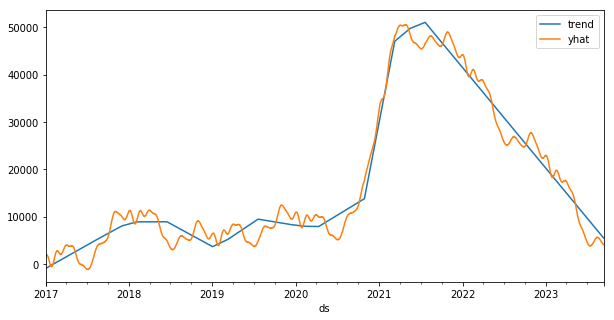

In [10]:
forecast.set_index('ds')[['trend','yhat']].plot(figsize=(10,5))

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


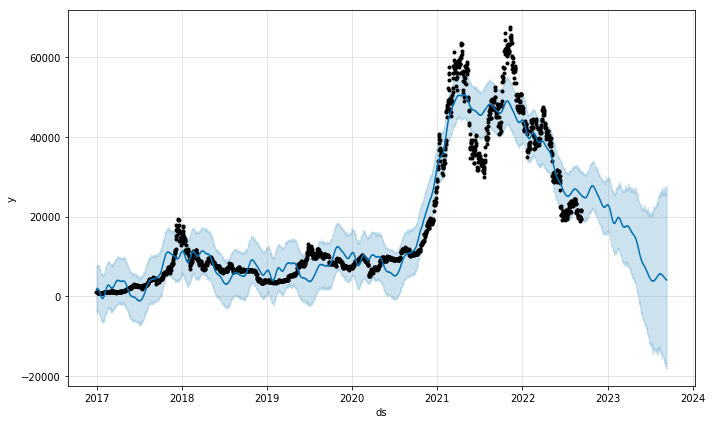

In [11]:
model.plot(forecast)
plt.show()
f1=forecast.set_index(['ds'])

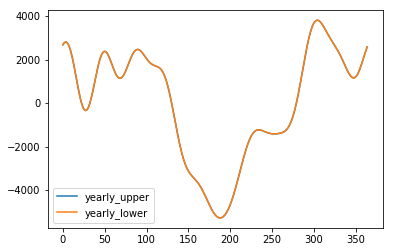

In [12]:
forecast[['yearly_upper','yearly_lower']][0:365].plot()

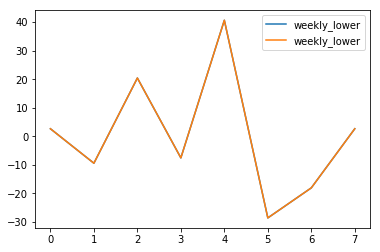

In [13]:
forecast[['weekly_lower','weekly_lower']][0:8].plot()

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


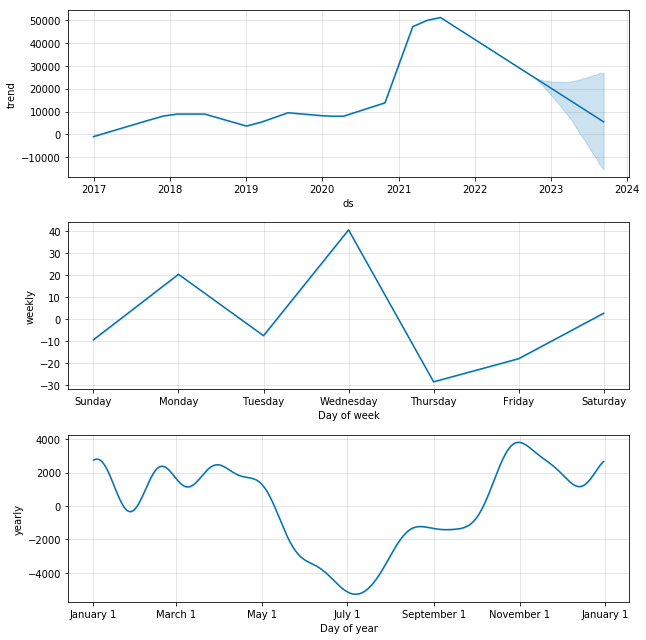

In [14]:
model.plot_components(forecast)
plt.show()